In [3]:
import numpy as np
import scipy.special as ss

class NeuralNetwork:
  def __init__(self, inputnodes, hiddennodes, outputnodes, lr):

    # Nodes
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    self.lr = lr

    # Weights
    self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

    # Activation Function
    self.activation_function = lambda x: ss.expit(x)

  # Forward, Back Propagation
  def train(self, inputs_list, targets_list):
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

    self.who += self.lr * np.dot((
        output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
    self.wih += self.lr * np.dot((
        hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

  def query(self, inputs_list):

    inputs = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [4]:
input_nodes = 3
hideen_nodes = 3
output_nodes = 3
lr = 0.3

nn = NeuralNetwork(
    input_nodes,
    hideen_nodes,
    output_nodes,
    lr)

In [5]:
data = [1.0, 0.5, -1.5]
nn.query(data)

array([[0.67841727],
       [0.62764434],
       [0.52769193]])

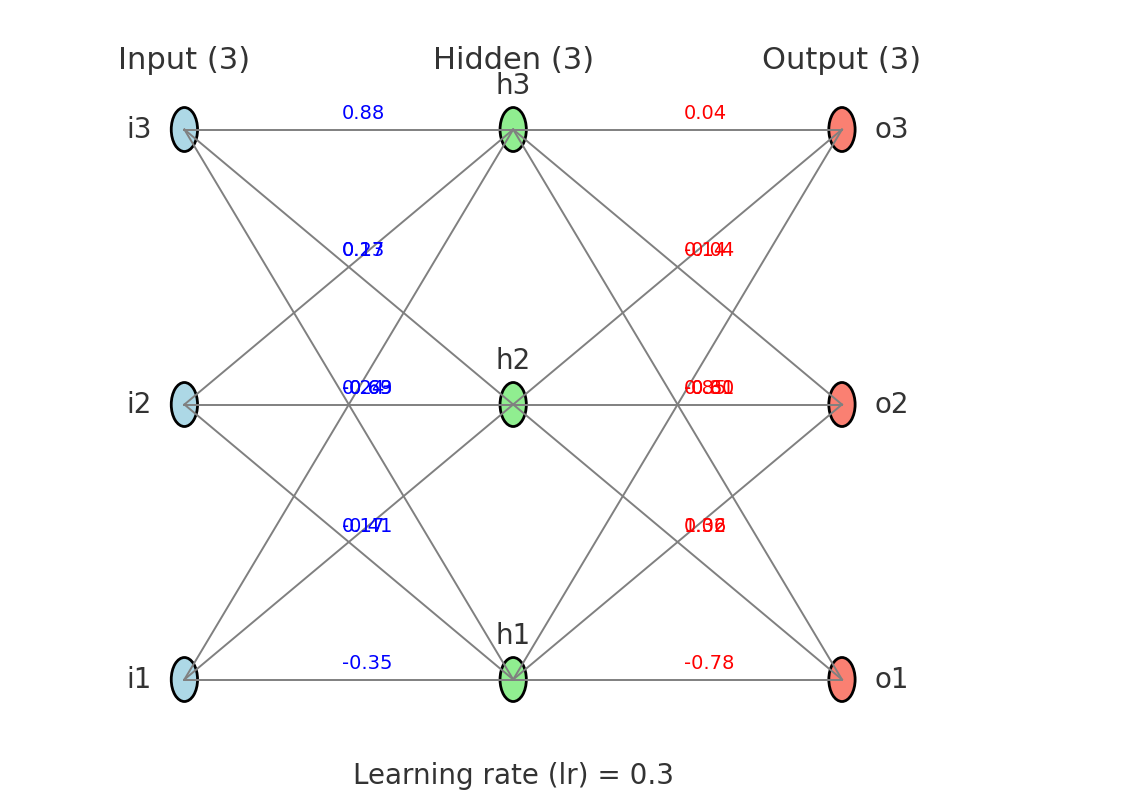

